3. Regression - Use the Adventure Works Cycles customer data you worked with in the last two challenges to create a regression model that predicts a customer's average monthly spend. The model should predict average monthly spend for new customers for whom no information about average monthly spend or previous bike purchases is available. 

In [1]:
import numpy as np
import numpy.random as nr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn import preprocessing 
from sklearn import linear_model
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import math 

%matplotlib inline

In [2]:
Customer = pd.read_csv('Customer.csv')
Customer.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age,AgeGroup
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,M,1,0,0,2,137947,89,0,31,Between 25 and 45
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,S,0,1,3,3,101141,117,1,32,Between 25 and 45
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,M,1,1,3,3,91945,123,0,32,Between 25 and 45
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,S,0,1,0,0,86688,50,0,29,Between 25 and 45
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,S,1,4,5,5,92771,95,1,29,Between 25 and 45


In [3]:
#Encode categorical values
cal_df = Customer[['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'AgeGroup']]
cal_df_encoded = pd.get_dummies(data = cal_df)
cal_df_encoded.head()

,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,...,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,AgeGroup_Between 25 and 45,AgeGroup_Between 45 and 55,AgeGroup_Over 55,AgeGroup_Under 25
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,1,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,0


In [4]:
cal_df_encoded.shape

(16404, 24)

In [5]:
num_df = Customer[['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']]
encoded_df = pd.concat([cal_df_encoded, num_df], axis=1, join= 'outer')

In [6]:
encoded_df.shape

(16404, 29)

## Split dataset

In [7]:
from sklearn.model_selection import train_test_split
nr.seed(9988)
labels = np.array(Customer['AveMonthSpend'])
features = np.array(encoded_df)
X_train, X_test, Y_train, Y_test = train_test_split (features, labels, test_size=0.3)

In [8]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(11482, 29) (11482,)
(4922, 29) (4922,)


## Rescale values

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X_train[:2,]

array([[ 2.02114596, -0.30393982, -0.32681107, -0.32746359, -0.33875844,
        -0.85531507, -0.63237842, -0.46564919, -0.46883089,  1.64434515,
        -0.30666722,  2.32307068, -0.44669937, -0.38630857, -0.65362212,
        -0.57446735,  1.01068238, -1.01068238, -1.07679545,  1.07679545,
        -1.29261506, -0.40165028,  4.10910394, -0.46786319, -1.43933877,
         0.43811237, -0.65272852, -0.00589171, -0.79290029],
       [-0.49476882, -0.30393982, -0.32681107, -0.32746359,  2.95195596,
        -0.85531507, -0.63237842, -0.46564919, -0.46883089,  1.64434515,
        -0.30666722,  2.32307068, -0.44669937, -0.38630857, -0.65362212,
        -0.57446735,  1.01068238, -1.01068238, -1.07679545,  1.07679545,
        -1.29261506, -0.40165028, -0.24336206,  2.13737695,  0.69476347,
        -0.43567715, -0.65272852, -1.19270998, -0.65094255]])

## Build models

In [11]:
#define and fit the linear regression model
lin_mod = linear_model.LinearRegression()
lin_mod.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

72.30639492496573
[-7.57305779e+12 -5.30128665e+12 -5.62590840e+12 -5.63496764e+12
 -5.78997923e+12 -9.41141244e+12  7.12281973e+12  6.03395309e+12
  6.06037396e+12  7.00018994e+12  4.41982370e+12  3.04584570e+13
  3.12319464e+13  2.81918985e+13  3.84090718e+13  3.62249769e+13
  6.30644636e+11  6.30644636e+11 -5.71603772e+12 -5.71603772e+12
  2.21694338e+13  1.58427495e+13  1.05244667e+13  1.75827875e+13
 -7.40367047e-02 -4.47371878e-03  1.65762902e+01  1.28161808e-02
  7.75198850e+00]


## Evaluate the model

In [13]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
Y_score = lin_mod.predict(X_test) 
print_metrics(Y_test, Y_score, 28)   

Mean Square Error      = 38.236893464563316
Root Mean Square Error = 6.1835987470536375
Mean Absolute Error    = 4.695694272744465
Median Absolute Error  = 3.687036146818272
R^2                    = 0.9484137258835061
Adjusted R^2           = 0.9481291264962676


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


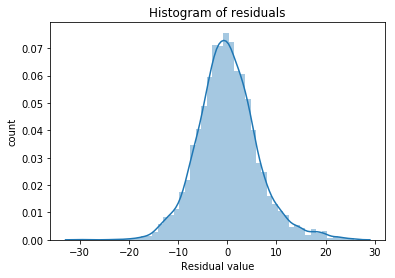

In [14]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(Y_test, Y_score)

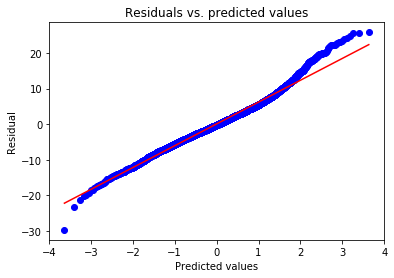

In [15]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(Y_test, Y_score)   

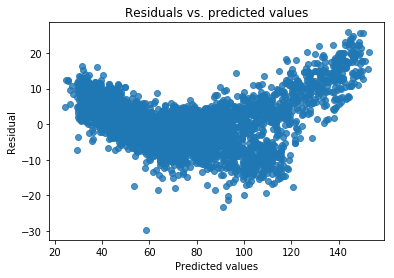

In [16]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(Y_test, Y_score) 

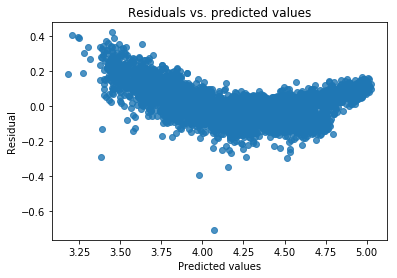

In [17]:
Y_score_transform = np.log(Y_score)
Y_test_transform = np.log(Y_test)
resid_plot(Y_test_transform, Y_score_transform) 

In [18]:
#Read in test data
test = pd.read_csv('AW_test.csv')

In [19]:
test.columns

Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Age', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome'],
      dtype='object')

In [20]:
#Convert BirthDate data format
test['BirthDate']= pd.to_datetime(test.BirthDate)
#Insert the date of data collection 1st Jan 1998
DataCollectionDate= '1998-01-01'
DataCollectionDate=pd.to_datetime(DataCollectionDate)

In [21]:
#Convert BirthDate into age at the collection date
from datetime import date
def calculateAge(birthday):
    age = DataCollectionDate.year - birthday.year - ((DataCollectionDate.month, DataCollectionDate.day)<(birthday.month, birthday.day))
    return age

test['Age'] = test['BirthDate'].apply(calculateAge)

In [22]:
#Classify Customers into age groups
test['AgeGroup']=''
test.loc[(test['Age']<25),'AgeGroup']='Under 25'
test.loc[(test['Age']>=25) & (test['Age']<=45), 'AgeGroup']='Between 25 and 45'
test.loc[(test['Age']>45) & (test['Age']<=55), 'AgeGroup']='Between 45 and 55'
test.loc[(test['Age']>55), 'AgeGroup']='Over 55'

In [23]:
#Encode categorical values
test_cal_df = test[['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'AgeGroup']]
test_cal_df_encoded = pd.get_dummies(data = test_cal_df)
test_cal_df_encoded.head()

,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,...,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,AgeGroup_Between 25 and 45,AgeGroup_Between 45 and 55,AgeGroup_Over 55,AgeGroup_Under 25
0,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,...,0,1,0,1,1,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0


In [24]:
test_num_df = test[['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']]
test_encoded_df = pd.concat([test_cal_df_encoded, test_num_df], axis=1, join= 'outer')

In [25]:
test_encoded_df.isnull().sum()

CountryRegionName_Australia         0
CountryRegionName_Canada            0
CountryRegionName_France            0
CountryRegionName_Germany           0
CountryRegionName_United Kingdom    0
CountryRegionName_United States     0
Education_Bachelors                 0
Education_Graduate Degree           0
Education_High School               0
Education_Partial College           0
Education_Partial High School       0
Occupation_Clerical                 0
Occupation_Management               0
Occupation_Manual                   0
Occupation_Professional             0
Occupation_Skilled Manual           0
Gender_F                            0
Gender_M                            0
MaritalStatus_M                     0
MaritalStatus_S                     0
AgeGroup_Between 25 and 45          0
AgeGroup_Between 45 and 55          0
AgeGroup_Over 55                    0
AgeGroup_Under 25                   0
HomeOwnerFlag                       0
NumberCarsOwned                     0
NumberChildr

In [26]:
test_features = scaler.transform(test_encoded_df)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [27]:
test_predictions= lin_mod.predict(test_features)
print(test_predictions)

[ 43.06938698 107.04133696  46.32955993  88.36615759  61.20121505
  44.87872571  96.64205825 127.74787361 103.58557327  55.05047697
  60.72584021  52.56638187  74.52118095  45.85895313  36.50833919
  52.08214809  85.72869917  74.52134082 110.45368036  60.75281652
  67.592843    76.47716295 146.61369839  85.42287154  53.79623342
  72.18641375  87.05491561 117.4415117   78.48348056  63.16117408
  69.03690289  81.8259428   41.7820995   72.11769258 107.06683759
 102.2079678  148.67356927  92.4437757   57.09140717  87.50396522
  47.28350194  81.70347881  80.91889036  48.79662825  56.74627894
  77.80450928  62.22293916  87.21195508 117.31377736  80.07761837
  79.06903888  95.98964698  82.4795877   67.98350945  48.69572416
  76.98109459  57.29639674  74.63077364  64.86255277  68.48747858
  45.87779451  67.95360692  90.84821521  84.17772602  45.03869904
  81.37198137  82.26730476 133.47511754  65.52476685 107.28172608
  86.28924262  67.26802757  92.77063002  46.33673635  66.43256253
  82.91543

In [30]:
test_predictions_df = pd.DataFrame(data = test_predictions)
test_predictions_df.reset_index()
cid = pd.DataFrame(data=test['CustomerID']);
cid.reset_index();
predictions_with_cid = pd.merge(cid, test_predictions_df, left_index=True, right_index=True);

In [32]:
#Save the result
predictions_with_cid.to_csv('Regression_prediction.csv')

RMSE 6.318533001 <br>
Grade 85